In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Read dataset
df=pd.read_csv("MS.csv")

In [4]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [5]:
df.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


In [6]:
# From this we can see the statifaction range from 1 to 10 
# While Loyalty range from -1.69 to 1.38

Text(0, 0.5, 'Loyalty')

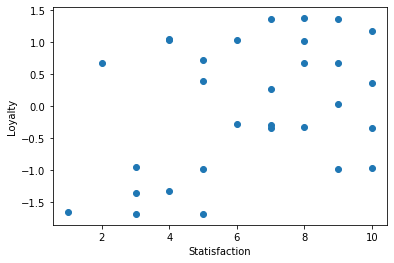

In [11]:
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel("Statisfaction")
plt.ylabel("Loyalty")

In [ ]:
# we can clearly see that there are 2 cluster one which represent low statisfaction and low loyality 
# And the other represent High loyalty and High Statisfaction

In [15]:
x=df.copy()
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
clusters=df.copy()
clusters['clustersprediction']=kmeans.fit_predict(x)


In [17]:
clusters

,Satisfaction,Loyalty,clustersprediction
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


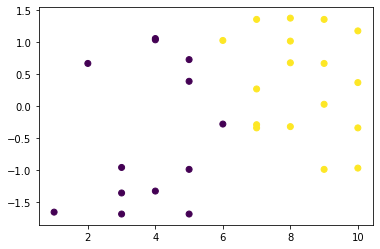

In [20]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['clustersprediction'])

In [ ]:
# We can see that  the process has ignored the y axis because of high values of x axis so we need to standardise theese values

In [21]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)

In [24]:
# Elbow Method
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

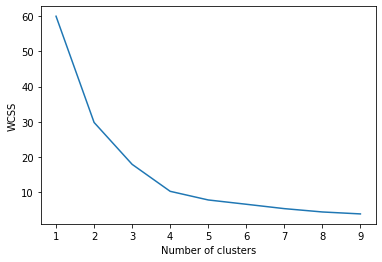

In [26]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [ ]:
# We can see that the best number of cluster should be 4 


In [35]:
clusters=df.copy()
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
clusters['clustersprediction']=kmeans_new.fit_predict(x_scaled)


In [36]:
clusters

,Satisfaction,Loyalty,clustersprediction
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


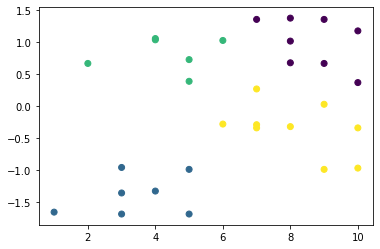

In [38]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['clustersprediction'])

## Results Interpretation

# We can clearly 4 clusters which is based on 4 category 

## 1 Low statisfaction and Low loyality 
## 2 Low statistcation and High Loyality
## 3 High statisfaction and Low Loyalty
## 4 High statisfacation and High Loyalty